In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import f_classif



from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report



In [ ]:
df = pd.read_excel("cardio_train 2.xlsx")

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.to_csv

<bound method NDFrame.to_csv of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       

 note  

 gender column : women -> 1 men ->2

 age column : in days should be converted to years /365

 ap_hi : upper blood pressure

 ap_lo : lower blood pressure

 height : in cm

 wight : in KG

 cholestrol : normal - above - well above


### Normalize the columns name to be intrtpreted easier

In [8]:
df=df.rename(columns={"gluc":"glucose","alco":"alcohol","active":"physically_active"})

In [9]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,physically_active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   age                70000 non-null  int64  
 2   gender             70000 non-null  int64  
 3   height             70000 non-null  int64  
 4   weight             70000 non-null  float64
 5   ap_hi              70000 non-null  int64  
 6   ap_lo              70000 non-null  int64  
 7   cholesterol        70000 non-null  int64  
 8   glucose            70000 non-null  int64  
 9   smoke              70000 non-null  int64  
 10  alcohol            70000 non-null  int64  
 11  physically_active  70000 non-null  int64  
 12  cardio             70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
pd.concat([df.head(5), df.sample(5), df.tail(5)])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,physically_active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
35034,50049,18328,1,170,62.0,120,80,1,1,0,0,1,1
22357,31937,23310,1,165,72.0,120,80,1,1,0,0,0,1
27336,39084,15130,2,168,66.0,120,80,1,1,0,0,0,1
19085,27257,17221,2,161,69.0,120,90,1,1,1,1,1,1
60829,86833,19151,1,170,65.0,140,100,2,1,0,0,0,1


In [12]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
glucose,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [13]:
len(df)

70000

In [14]:
df.isnull().sum()

id                   0
age                  0
gender               0
height               0
weight               0
ap_hi                0
ap_lo                0
cholesterol          0
glucose              0
smoke                0
alcohol              0
physically_active    0
cardio               0
dtype: int64

unique values

In [15]:
pd.DataFrame([ df.nunique(), df.dtypes ], index=['Unique Values', 'Data Types'])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,physically_active,cardio
Unique Values,70000,8076,2,109,287,153,157,3,3,2,2,2,2
Data Types,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64


In [16]:
df.duplicated().sum()

0

In [17]:
df.drop('id', axis=1, inplace=True)

In [18]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,physically_active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [19]:
target = 'cardio'
featuers = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'physically_active']

In [20]:
featuers


['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'glucose',
 'smoke',
 'alcohol',
 'physically_active']

In [21]:
def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    IQR = Q3 - Q1

    min_v = Q1 - 1.5 * IQR
    max_v = Q3 + 1.5 * IQR

    return series.clip(lower=min_v, upper=max_v)

In [22]:
exclude = ['glucose','alcohol','smoke','colesterol','physically_active']

for num_feature in [f for f in featuers if f not in exclude]:
    for gender_category in df[target].unique():
        mask = df[target] == gender_category
        df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])

C:\Users\adham\AppData\Local\Temp\ipykernel_37704\1873582916.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[168. 156. 151. ... 159. 168. 170.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])


feature engineering

In [23]:
df['age_years'] = (df['age'] / 365).round().astype(int)
df.drop('age', axis=1, inplace=True)

In [24]:
df['height'] = df['height'] / 100
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
# Create pulse pressure (difference between systolic and diastolic)
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['health_index'] = (df['physically_active'] * 1) - (df['smoke'] * 0.5) - (df['alcohol'] * 0.5)
df['cholesterol_gluc_interaction'] = df['cholesterol'] * df['glucose']
# Create binary hypertension indicator
df['hypertension'] = ((df['ap_hi'] >= 130) | (df['ap_lo'] >= 90)).astype(int)


In [25]:
df.columns
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,physically_active,cardio,age_years,bmi,pulse_pressure,health_index,cholesterol_gluc_interaction,hypertension
0,2,1.68,62.0,110,80,1,1,0,0,1,0,50,219671.201814,30,1.0,1,0
1,1,1.56,85.0,140,90,3,1,0,0,1,1,55,349276.791584,50,1.0,3,1
2,1,1.65,64.0,130,70,3,1,0,0,0,1,52,235078.053260,60,0.0,3,1
3,2,1.69,82.0,150,100,1,1,0,0,1,1,48,287104.793250,50,1.0,1,1
4,1,1.56,56.0,100,60,1,1,0,0,0,0,48,230111.768573,40,0.0,1,0


In [26]:
featuers=['gender','height' ,'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'glucose', 'smoke',
       'alcohol', 'physically_active', 'age_years', 'bmi', 'pulse_pressure',
       'health_index', 'cholesterol_gluc_interaction','hypertension']

F-value: Measures how much the means between groups differ relative to the variance within the groups. Higher = more likely the feature is important.

p-value: Probability that the observed difference is due to chance.

p < 0.05 → Statistically significant

p ≥ 0.05 → Not significant

2. Data Analysis and visualization Milestone 2

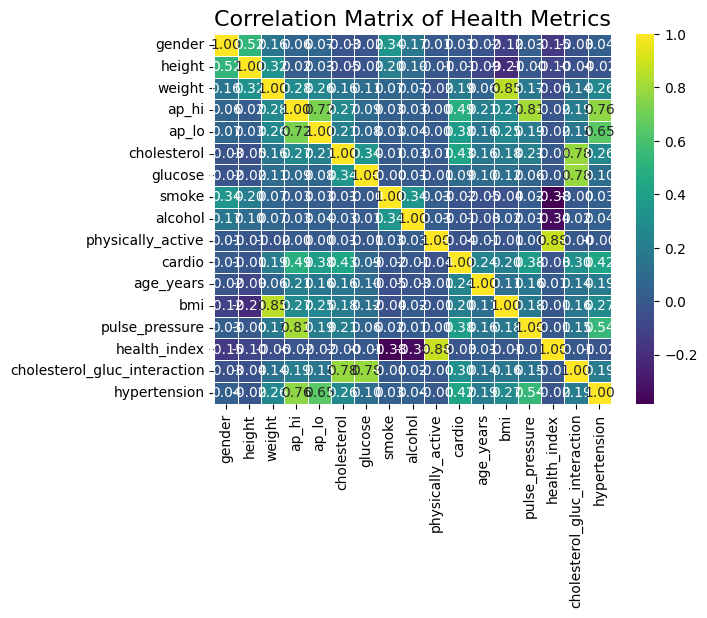

In [27]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix of Health Metrics', fontsize=16)
plt.show()

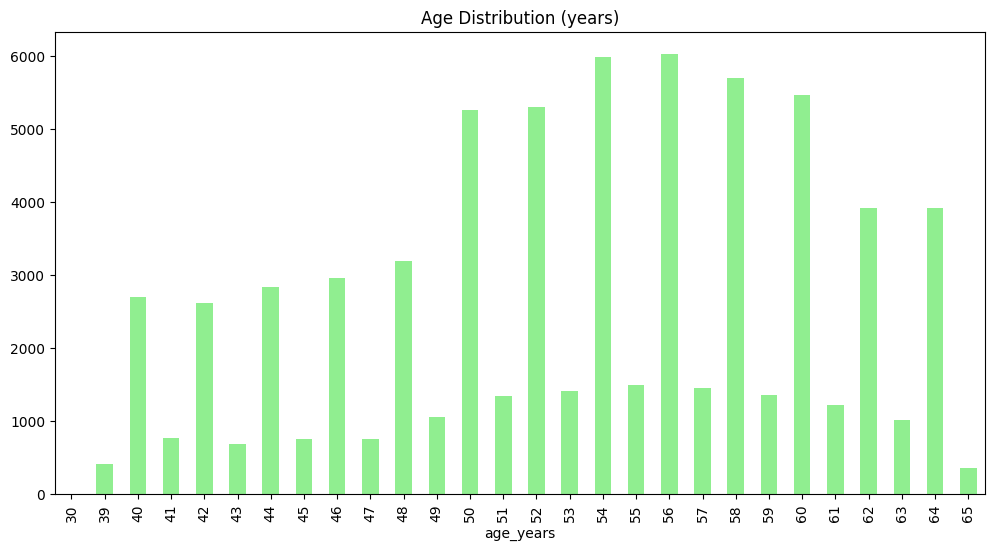

In [28]:
df['age_years'].value_counts().sort_index().plot(kind='bar', color='lightgreen', figsize=(12,6))
plt.title("Age Distribution (years)")
plt.show()

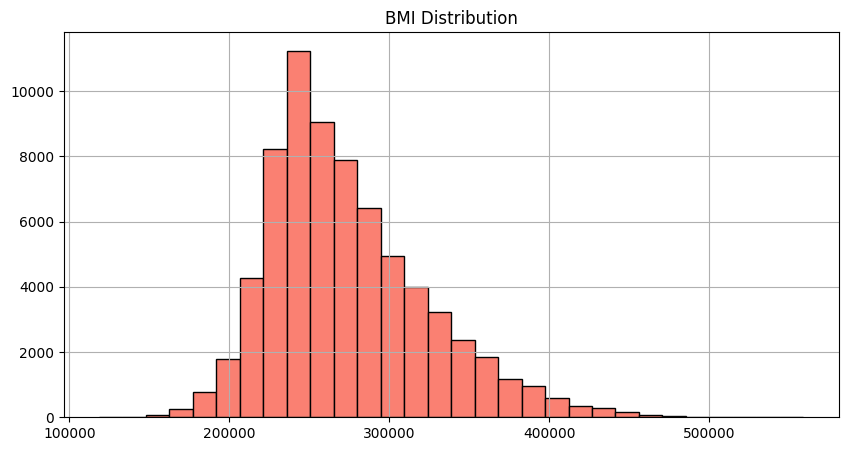

In [29]:
df['bmi'].hist(bins=30, color='salmon', edgecolor='black', figsize=(10,5))
plt.title("BMI Distribution")
plt.show()

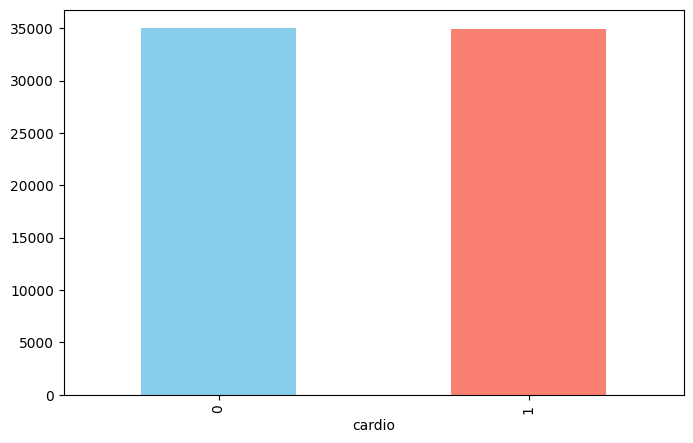

In [30]:
df['cardio'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8,5))
plt.show()

In [31]:
f_values, p_values = f_classif(df[featuers], df[target])

for i in range(len(featuers)):
    print(f"{featuers[i]:15s}: F-value = {f_values[i]:6.3f}, p-value = {p_values[i]:3.3f}")

gender         : F-value =  4.604, p-value = 0.032
height         : F-value = 10.640, p-value = 0.001
weight         : F-value = 2702.000, p-value = 0.000
ap_hi          : F-value = 21922.892, p-value = 0.000
ap_lo          : F-value = 11575.413, p-value = 0.000
cholesterol    : F-value = 15554.452, p-value = 0.000
glucose        : F-value = 562.773, p-value = 0.000
smoke          : F-value = 16.791, p-value = 0.000
alcohol        : F-value =  3.761, p-value = 0.052
physically_active: F-value = 89.091, p-value = 0.000
age_years      : F-value = 4193.662, p-value = 0.000
bmi            : F-value = 3015.623, p-value = 0.000
pulse_pressure : F-value = 11607.067, p-value = 0.000
health_index   : F-value = 44.285, p-value = 0.000
cholesterol_gluc_interaction: F-value = 6925.072, p-value = 0.000
hypertension   : F-value = 15420.373, p-value = 0.000


We should drop features which has p value > 0.05

In [32]:
scaler = StandardScaler()
df["age_years"]= scaler.fit_transform(df[["age_years"]])
df["height"]= scaler.fit_transform(df[["height"]])
df["weight"]= scaler.fit_transform(df[["weight"]])
df["ap_hi"]= scaler.fit_transform(df[["ap_hi"]])
df["ap_lo"]= scaler.fit_transform(df[["ap_lo"]])
df["bmi"]=scaler.fit_transform(df[["bmi"]])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target, axis=1),
    df[target],
    test_size=0.25,
    random_state=1234,
    stratify=df[target]
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [34]:
print(f"{X_train_scaled.shape= }")
print(f"{y_train.shape= }")
print(f"{X_test_scaled.shape= }")
print(f"{y_test.shape= }")

X_train_scaled.shape= (52500, 16)
y_train.shape= (52500,)
X_test_scaled.shape= (17500, 16)
y_test.shape= (17500,)


In [35]:
y_train.value_counts()

cardio
0    26266
1    26234
Name: count, dtype: int64

In [36]:
y_test.value_counts()

cardio
0    8755
1    8745
Name: count, dtype: int64

In [37]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'glucose', 'smoke', 'alcohol', 'physically_active', 'age_years', 'bmi',
       'pulse_pressure', 'health_index', 'cholesterol_gluc_interaction',
       'hypertension'],
      dtype='object')

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
     "Decision Tree": DecisionTreeClassifier(random_state=42),
     "XGBoost": XGBClassifier(random_state=42 )
}


results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    # Predict probabilities for the positive class (1)
    # Only if the model supports the predict_proba method
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None 
       # Train,Test Accuracy
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    print(f"{name} : Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f}")
    #print(y_prob)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        # ROC-AUC measures model’s ability to distinguish between classes
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    })

results_df = pd.DataFrame(results)
print("Model Performance Comparison:\n")
print(results_df)

Logistic Regression : Train Accuracy: 0.781 | Test Accuracy: 0.780
Random Forest : Train Accuracy: 0.977 | Test Accuracy: 0.813
Gradient Boosting : Train Accuracy: 0.833 | Test Accuracy: 0.831
Decision Tree : Train Accuracy: 0.977 | Test Accuracy: 0.779
XGBoost : Train Accuracy: 0.853 | Test Accuracy: 0.834
Model Performance Comparison:

                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.780400   0.845309  0.686106  0.757432  0.856311
1        Random Forest  0.812914   0.856789  0.751172  0.800512  0.890573
2    Gradient Boosting  0.831314   0.954353  0.695712  0.804762  0.910679
3        Decision Tree  0.778743   0.783875  0.769354  0.776547  0.784432
4              XGBoost  0.833771   0.920704  0.730246  0.814489  0.908855


In [39]:
rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf,
    n_iter=40, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)
random_search_rf.fit(X_train_scaled, y_train)
print("Random Forest best params:", random_search_rf.best_params_)


Random Forest best params: {'bootstrap': False, 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 194}


In [40]:

gb = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 7),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.7, 0.3)
}

random_search_gb = RandomizedSearchCV(
    gb, param_distributions=param_dist_gb,
    n_iter=40, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)
random_search_gb.fit(X_train_scaled, y_train)
print("Gradient Boosting best params:", random_search_gb.best_params_)


Gradient Boosting best params: {'learning_rate': 0.08997219434305109, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 114, 'subsample': 0.8368209952651107}


In [41]:
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')

param_dist_lr = {
    'C': uniform(0.01, 10),     # regularization strength
    'penalty': ['l2']
}

random_search_lr = RandomizedSearchCV(
    log_reg, param_distributions=param_dist_lr,
    n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)
random_search_lr.fit(X_train_scaled, y_train)
print("Logistic Regression best params:", random_search_lr.best_params_)


Logistic Regression best params: {'C': 1.4049386065204184, 'penalty': 'l2'}


In [42]:
xgb = XGBClassifier(eval_metric='logloss',random_state=42, use_label_encoder=False)

param_dist_xgb = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.9),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 5),
    'reg_lambda': uniform(0, 5),
    'reg_alpha': uniform(0, 5)
}

random_search_xgb = RandomizedSearchCV(
    xgb, param_distributions=param_dist_xgb,
    n_iter=40, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)
random_search_xgb.fit(X_train_scaled, y_train)
print("XGBoost best params:", random_search_xgb.best_params_)


c:\Users\adham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:47:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost best params: {'colsample_bytree': 0.7707954759246867, 'gamma': 1.2803416138066197, 'learning_rate': 0.046390230584588216, 'max_depth': 9, 'n_estimators': 114, 'reg_alpha': 0.5544541040591566, 'reg_lambda': 2.1966825093288507, 'subsample': 0.7605157607006188}


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_models = {
    "Logistic Regression": random_search_lr.best_estimator_,
    "Random Forest": random_search_rf.best_estimator_,
    "Gradient Boosting": random_search_gb.best_estimator_,
    "XGBoost": random_search_xgb.best_estimator_
}

results = []
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
     # Train,Test Accuracy
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    print(f"{name} : Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f}")
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })


import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Accuracy", ascending=False))


Logistic Regression : Train Accuracy: 0.781 | Test Accuracy: 0.780
Random Forest : Train Accuracy: 0.843 | Test Accuracy: 0.833
Gradient Boosting : Train Accuracy: 0.844 | Test Accuracy: 0.835
XGBoost : Train Accuracy: 0.840 | Test Accuracy: 0.834
                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
2    Gradient Boosting  0.835371   0.929660  0.725443  0.814953  0.912020
3              XGBoost  0.834400   0.936930  0.716867  0.812257  0.912089
1        Random Forest  0.833371   0.953760  0.700515  0.807753  0.910732
0  Logistic Regression  0.780171   0.845027  0.685878  0.757180  0.856303


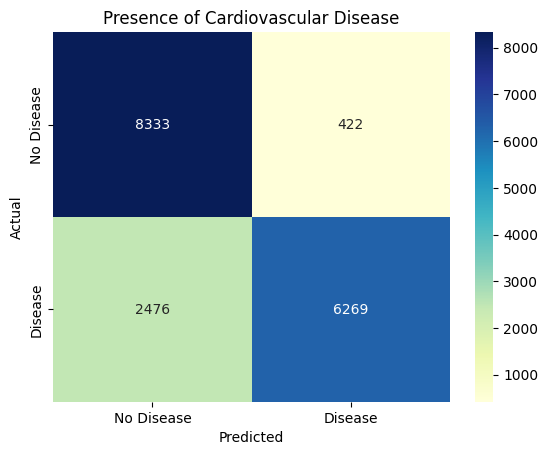

In [44]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Presence of Cardiovascular Disease')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

threshold_results = []

for name, model in best_models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    thresholds = np.arange(0.0, 1.0, 0.01)

    best_threshold = 0.5
    best_f1 = 0
    best_metrics = {}


    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
            best_metrics = {
                "Accuracy": accuracy_score(y_test, y_pred),
                "Recall": recall_score(y_test, y_pred),
                "Precision": precision_score(y_test, y_pred),
                "F1": f1,
                "ROC-AUC": roc_auc_score(y_test, y_prob)
            }

    threshold_results.append({
        "Model": name,
        "Best_Threshold": best_threshold,
        **best_metrics
    })


results_df = pd.DataFrame(threshold_results)
print("✅ Best Threshold for Each Model (Based on Highest F1 Score):\n")
print(results_df.sort_values(by="F1", ascending=False).round(3))


✅ Best Threshold for Each Model (Based on Highest F1 Score):

                 Model  Best_Threshold  Accuracy  Recall  Precision     F1  \
3              XGBoost            0.39     0.829   0.796      0.851  0.823   
2    Gradient Boosting            0.40     0.829   0.794      0.854  0.823   
1        Random Forest            0.37     0.826   0.808      0.837  0.823   
0  Logistic Regression            0.39     0.764   0.787      0.752  0.769   

   ROC-AUC  
3    0.912  
2    0.912  
1    0.911  
0    0.856  



 Best model: XGBoost
Best threshold: 0.39


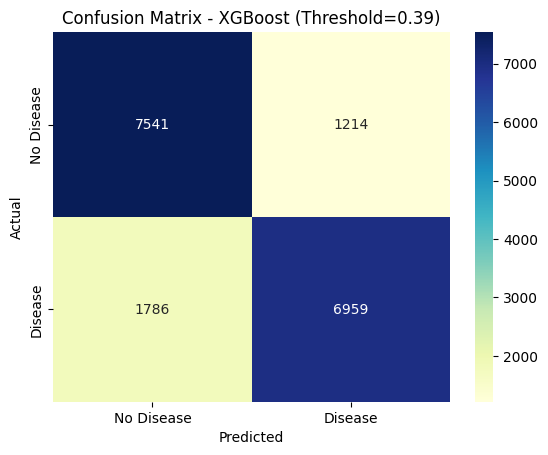


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      8755
           1       0.85      0.80      0.82      8745

    accuracy                           0.83     17500
   macro avg       0.83      0.83      0.83     17500
weighted avg       0.83      0.83      0.83     17500



In [65]:

best_thresholds = results_df.set_index("Model")["Best_Threshold"].to_dict()

best_model_name = "XGBoost"
best_model = best_models[best_model_name]
best_threshold = best_thresholds[best_model_name]

print(f"\n Best model: {best_model_name}")
print(f"Best threshold: {best_threshold:.2f}")


y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred_final = (y_prob >= best_threshold).astype(int)



cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - {best_model_name} (Threshold={best_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
fig = plt.gcf()
plt.savefig('confusion_matrix_xgboost_cvd.png')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_final))


In [47]:
#Final model deployment pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import json
import os

features = ['gender','height','weight', 'ap_hi', 'ap_lo', 'cholesterol',
            'glucose', 'smoke', 'alcohol', 'physically_active',
            'age_years', 'bmi', 'pulse_pressure', 'health_index',
            'cholesterol_gluc_interaction','hypertension']

In [48]:
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(
    df[features],
    df[target],
    test_size=0.25,
    random_state=1234,
    stratify=df[target]
)

In [49]:
numeric_features = features
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

In [50]:
final_xgb = best_models["XGBoost"]  # this uses your tuned model

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", final_xgb)
])

In [51]:
pipeline.fit(X_train_pipe, y_train_pipe)


c:\Users\adham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:48:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['gender', 'height', 'weight',
                                                   'ap_hi', 'ap_lo',
                                                   'cholesterol', 'glucose',
                                                   'smoke', 'alcohol',
                                                   'physically_active',
                                                   'age_years', 'bmi',
                                                   'pulse_pressure',
                                                   'health_index',
                                                   'cholesterol_gluc_interaction',
                                                   'hypertension'])])),
                ('model',
                 XGBClassifier(base_sc...
                               gamma=1.2803416138066197, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.046390230584588216, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=9,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=114,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [52]:
y_prob_pipe = pipeline.predict_proba(X_test_pipe)[:, 1]
y_pred_pipe = (y_prob_pipe >= best_threshold).astype(int)

print("Pipeline Performance:")
print(classification_report(y_test_pipe, y_pred_pipe))

# 7. Save final pipeline
os.makedirs("artifacts", exist_ok=True)
joblib.dump(pipeline, "artifacts/cvd_pipeline.joblib")
print("Saved pipeline as artifacts/cvd_pipeline.joblib")

# 8. Save metadata
metadata = {
    "model_name": "cvd_xgboost_pipeline",
    "version": "1.0",
    "features": features,
    "best_threshold": float(best_threshold)
}

with open("artifacts/metadata.json", "w") as f:
    json.dump(metadata, f)

print("Saved metadata.json")

Pipeline Performance:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      8755
           1       0.85      0.80      0.82      8745

    accuracy                           0.83     17500
   macro avg       0.83      0.83      0.83     17500
weighted avg       0.83      0.83      0.83     17500

Saved pipeline as artifacts/cvd_pipeline.joblib
Saved metadata.json


In [ ]:
import mlflow
from mlflow.models import infer_signature
ecperimpent_id = mlflow.create_experiment(name= "Cardiovascular Disease Prediction",
                                        artifact_location="artifacts/")
print(f"Experiment ID: {ecperimpent_id}")

Experiment ID: 289764331553040691


c:\Users\adham\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


In [70]:
with mlflow.start_run(experiment_id=ecperimpent_id, run_name="XGBoost_CVD_Prediction"):
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_param("best_threshold", best_threshold)
    mlflow.log_params(random_search_xgb.best_params_)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred_final),
        "Precision": precision_score(y_test, y_pred_final),
        "Recall": recall_score(y_test, y_pred_final),
        "F1": f1_score(y_test, y_pred_final),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }
    mlflow.log_metrics(metrics)
    mlflow.log_artifact("artifacts/cvd_pipeline.joblib")
    mlflow.log_artifact("artifacts/metadata.json")
    mlflow.log_figure(fig, "confusion_matrix_xgboost_cvd.png")
    signature = infer_signature(X_test, y_prob_pipe)
    mlflow.sklearn.log_model(pipeline, name="cvd_xgboost_pipeline_model", signature=signature, input_example=X_test.head(5))
    print("Logged model and artifacts to MLflow")
    

c:\Users\adham\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\adham\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_

Logged model and artifacts to MLflow
